In [1]:
import numpy as np
import pyfits
import matplotlib.pyplot as plt

# Let's build a 2D Gaussian grid

In [11]:
i,j =np.indices([200,200])

In [12]:
center = np.array([(i.max()-i.min())/2.0,(j.max()-j.min())/2.0])

In [13]:
xc = center[1]
yc = center[0]

In [14]:
r = np.hypot(i-yc,j-xc)

In [17]:
s = 50
Gaussian = (1/(s*np.sqrt(2*np.pi)))*np.exp(-r**2/(2*s**2))

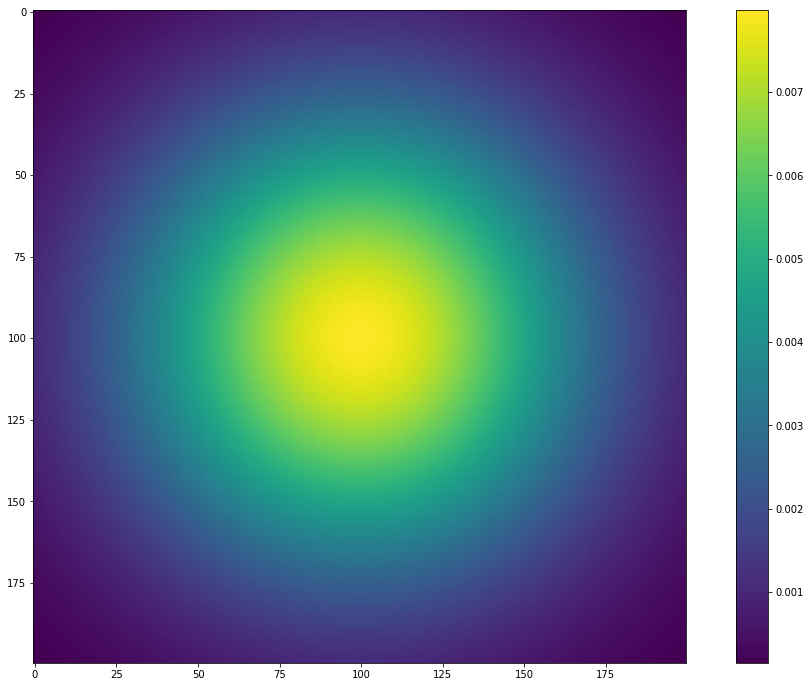

In [21]:
fig = plt.figure(figsize=(18,12))


plt.imshow(Gaussian)
plt.colorbar()


# Let's add some noise to it

In [23]:
mean=0
SNR = 1000
size=200
sigma = Gaussian.std()/np.sqrt(SNR)
gaussian_noise =np.random.normal(mean,scale=sigma,size =(size,size))

In [24]:
nois_g = Gaussian + gaussian_noise

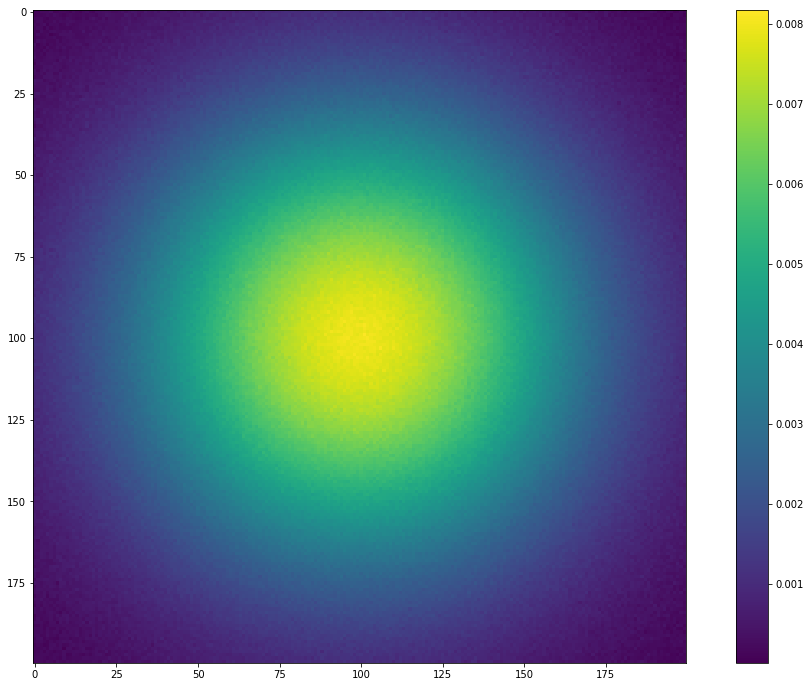

In [27]:
fig = plt.figure(figsize=(18,12))

plt.imshow(nois_g)
plt.colorbar()

# Now we define a 2D gaussian model and fit it to the data we generated

In [111]:
def Gaussian_2d((x,y),A,mu_x,mu_y,sigma_x,sigma_y):
    G= A*np.exp(-(x-mu_x)**2/(2*sigma_x**2) - (y-mu_y)**2/(2*sigma_y**2) )
    return np.ravel(G)

In [103]:
x = np.linspace(0, 200, 200)
y = np.linspace(0, 200, 200)
x, y = np.meshgrid(x, y)


In [104]:
from scipy.optimize import curve_fit

In [105]:
p0 = np.array([0.05, 99,99,47,47])
popt, pcov = curve_fit(Gaussian_2d,(x,y), np.ravel(nois_g),p0)

# You should be careful about introducing the objective function and then the arguments in curve_fit. curve_fit expects to have a 1D array to minimize

In [112]:
print popt

[  7.97981711e-03   9.99991529e+01   9.99931297e+01   5.02478881e+01
   5.02504390e+01]


# You can see that the fitting returned values close to those used to simulate the Gaussian in the first step. Now to show how accurate the fitting is visually, we can show the simulation with the contours from the fitting model

In [113]:
fitted_gaussian = Gaussian_2d((x,y),*popt)
fitted_gaussian = fitted_gaussian.reshape(200,200) # to reconstruct a 2D array

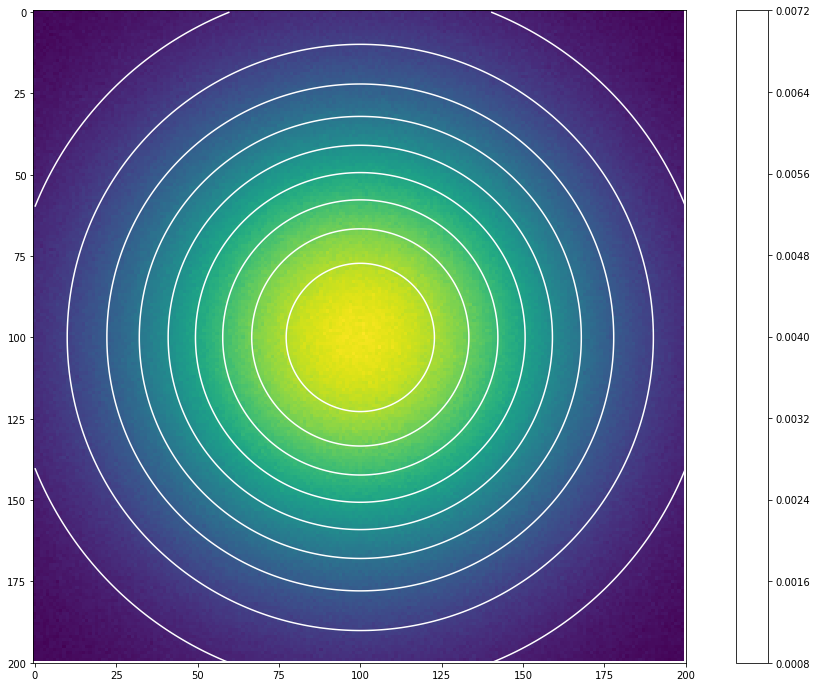

In [118]:
fig = plt.figure(figsize=(18,12))
plt.imshow(nois_g)
plt.contour(x,y,fitted_gaussian,10,colors='w')


# Et Voila!!